In [1]:
import numpy as np
import sys,os
import multiprocessing as mp
import numpy as np
import pandas as pd
import libpysal as ps
sys.path.append('/Users/lziqi/Desktop/mgwr-optim')
#sys.path.append('/Users/lziqi/Desktop/MGWR computational improvements/mgwr-/')
from mgwr.gwr import GWR,MGWR
from mgwr.sel_bw import Sel_BW
import matplotlib.pyplot as plt
import time
#from memory_profiler import memory_usage
#%load_ext memory_profiler

C:\Users\lziqi\AppData\Local\Continuum\anaconda3\envs\mgwr-clean\lib\site-packages\libpysal\weights\util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')


In [2]:
%env OMP_NUM_THREADS=1
%env MKL_NUM_THREADS=1

env: OMP_NUM_THREADS=1
env: MKL_NUM_THREADS=1


In [3]:
%%time
times = []
k = 10
for size in [10000]:
    for cores in np.arange(1,9,1):
        pool=mp.Pool(cores)
        filename = "test0131_sub_"+str(size)+"_"+str(k) + ".csv"
        test = pd.read_csv(filename)
        
        coords = np.array(list(zip(test.x_coord.values,test.y_coord.values)))
        X = test.iloc[:,4:].values
        y = test.Y_new.values.reshape(-1,1)
        
        start = time.time()   
        se = Sel_BW(coords,y,X,multi=True,constant=False)
        bws = se.search(pool=pool)
        
        time_used_bw = (time.time() - start)
        
        rslt=MGWR(coords,y,X,selector=se,constant=False).fit(n_chunks=1,pool=pool)
        
        time_used_total = (time.time() - start)
        
        times += [time_used_bw]
        times += [time_used_total]

        pool.close()
        pool.join()
        

  3%|██▎                                                                           | 6/200 [29:27<15:40:00, 290.73s/it]

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

  0%|▍                                                                             | 1/200 [03:40<12:11:24, 220.53s/it]

  1%|▊                                                                             | 2/200 [07:26<12:13:06, 222.15s/it]

  2%|█▏                                                                            | 3/200 [11:17<12:17:59, 224.77s/it]

  2%|█▌                                                                            | 4/200 [15:02<12:15:03, 225.02s/it]

  2%|█▉                                                                            | 5/200 [18:48<12:12:03, 225.25s/it]

  3%|██▎                                                                           | 6/200 [22:14<11:48:56, 219.26s/it]


  0%|                          

Wall time: 8h 34min 34s


Text(0.5, 1.0, 'N=10000')

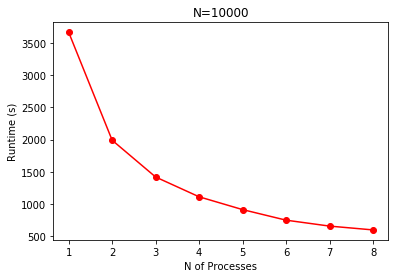

In [4]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
times = np.array(times)
plt.plot(np.arange(1,9,1),np.array(times).reshape(-1,2)[:,0],c='r',marker='o')
plt.xlabel('N of Processes')
plt.ylabel('Runtime (s)')
plt.title('N=10000')

Text(0.5, 1.0, 'N=10000')

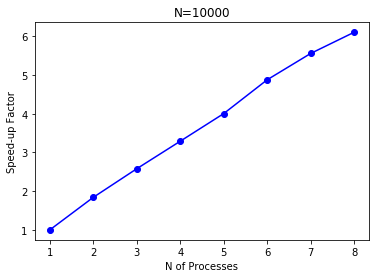

In [5]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
times = np.array(times)
plt.plot(np.arange(1,9,1),np.array(times).reshape(-1,2)[0,0]/np.array(times).reshape(-1,2)[:,0],c='b',marker='o')
plt.xlabel('N of Processes')
plt.ylabel('Speed-up Factor')
plt.title('N=10000')

Text(0.5, 1.0, 'N=10000')

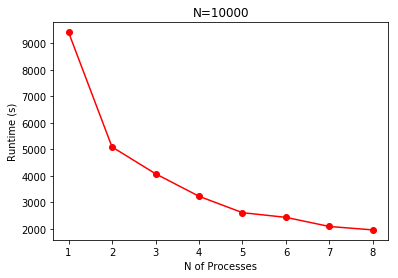

In [6]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
times = np.array(times)
plt.plot(np.arange(1,9,1),np.array(times).reshape(-1,2)[:,1],c='r',marker='o')
plt.xlabel('N of Processes')
plt.ylabel('Runtime (s)')
plt.title('N=10000')

Text(0.5, 1.0, 'N=10000')

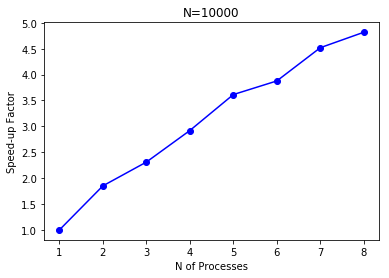

In [7]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
times = np.array(times)
plt.plot(np.arange(1,9,1),np.array(times).reshape(-1,2)[0,1]/np.array(times).reshape(-1,2)[:,1],c='b',marker='o')
plt.xlabel('N of Processes')
plt.ylabel('Speed-up Factor')
plt.title('N=10000')

In [8]:
pd.DataFrame(np.array(times).reshape(-1,2)).to_csv("scalability_10000_8.csv")